# 📄 Descripción del Dataset: Wine Quality

## 📌 Fuente
[UCI Machine Learning Repository – Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

---

## 📊 Resumen General

| Atributo                  | Valor                            |
|--------------------------|----------------------------------|
| **Número de instancias** | 6,497 registros totales          |
| **Tipos de vino**        | Vino blanco (4,898) y tinto (1,599) |
| **Número de atributos**  | 11 características + 1 objetivo  |
| **Tipo de atributos**    | Todos numéricos continuos        |
| **Variable objetivo**    | `quality` (entero de 3 a 9)      |

---

## 🧬 Variables (entradas)

Las variables representan propiedades físico-químicas del vino:

- `fixed acidity`: Ácido tartárico
- `volatile acidity`: Ácido acético
- `citric acid`: Ácido cítrico
- `residual sugar`: Azúcar residual (g/L)
- `chlorides`: Concentración de sal
- `free sulfur dioxide`: SO₂ libre
- `total sulfur dioxide`: SO₂ total
- `density`: Densidad del vino
- `pH`: Nivel de acidez
- `sulphates`: Sulfatos (agentes conservantes)
- `alcohol`: Porcentaje de alcohol (% vol.)

---

## 🎯 Variable Objetivo: `quality`

- Representa la calidad sensorial del vino evaluada por catadores expertos.
- Es un entero entre **3 y 9** (7 clases posibles).
- Distribución **desbalanceada** (la mayoría son calidad 5 o 6).

| Clase (`quality`) | Interpretación        |
|-------------------|------------------------|
| 3–4               | Calidad muy baja       |
| 5–6               | Calidad media          |
| 7–9               | Calidad buena a alta   |

---

## 🔍 Clasificación vs Regresión

- Aunque la variable `quality` es numérica discreta, se puede usar como:
  - **Clasificación multiclase**: ✅ Recomendado para esta práctica.
  - **Regresión**: posible, pero **no se ajusta al objetivo de la práctica**.

---

## 📈 Aplicabilidad en Preprocesamiento

| Técnica                      | ¿Aplica?  | Comentario                                     |
|-----------------------------|-----------|------------------------------------------------|
| Escalado / Normalización    | ✅        | Todas las variables son numéricas              |
| Detección de Outliers       | ✅        | Algunas variables tienen valores extremos      |
| Balanceo de Clases          | ✅        | Distribución de clases desbalanceada           |
| One-hot Encoding             | ⚠️        | No tiene categóricas directas, pero se pueden crear artificialmente |
| Clasificación Multiclase    | ✅        | 7 clases disponibles (cumple con los requisitos del trabajo) |

---

## ✅ Conclusión

El dataset **Wine Quality** es una excelente opción para abordar un problema de **clasificación multiclase supervisado**, permitiendo aplicar técnicas como normalización, detección de outliers, y balanceo de clases. Su estructura simple y bien documentada lo hace ideal para proyectos de aprendizaje de máquinas.



In [3]:
%pip install pandas
%pip install scikit-learn
%pip install torch numpy
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.9/10.7 MB 8.0 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.7 MB 8.7 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.7 MB 8.7 MB/s eta 0:00:01
   --------------------------------- ------ 8.9/10.7 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 8.4 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------

In [4]:
import os
import pandas as pd

# Nombre del archivo local
archivo_local = "winequality-white.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Solo descarga si no existe localmente
if not os.path.exists(archivo_local):
    print("Descargando dataset...")
    df = pd.read_csv(url, sep=';')
    df.to_csv(archivo_local, index=False)
else:
    print("Cargando dataset local...")
    df = pd.read_csv(archivo_local)

# Mostrar primeras filas
print(df.head())


Cargando dataset local...
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5      

In [2]:
import pandas as pd

# Intenta cargar el archivo con separador coma
df = pd.read_csv("winequality-white.csv", sep=',')

# Limpiar espacios en nombres de columnas
df.columns = df.columns.str.strip()

# Mostrar nombres de columnas corregidos
print(df.columns.tolist())



['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


Creemos el primer dataframe el cual solo tiene la conversión de la variable categorica.

In [3]:
# Crear variable categórica basada en niveles de alcohol
df["alcohol_level"] = pd.cut(df["alcohol"],
                             bins=[8, 10, 11.5, 13, 15],
                             labels=["bajo", "medio", "alto", "muy_alto"])

# Aplicar One-Hot Encoding a 'alcohol_level' (sin escalado aún)
df_v1 = pd.get_dummies(df, columns=["alcohol_level"], drop_first=True)

# Verificar que se creó correctamente
print(df_v1.head())
print("Forma:", df_v1.shape)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  alcohol_level_medio  alcohol_level_alto  \
0      8.8        6   

Construyamos el v2, el cual contiene el balanceoy la conversion de las categoricas.

In [7]:
from sklearn.utils import resample

# Separar clases
df_grupos = [df_v1[df_v1["quality"] == clase] for clase in df_v1["quality"].unique()]

# Encontrar la clase más grande
max_len = max(len(grupo) for grupo in df_grupos)

# Balancear todas las clases al tamaño de la más grande
df_resampled = [resample(grupo, 
                         replace=True, 
                         n_samples=max_len, 
                         random_state=42) for grupo in df_grupos]

# Combinar y mezclar
df_v2 = pd.concat(df_resampled).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación
print(df_v2["quality"].value_counts())
print("Forma:", df_v2.shape)


quality
5    2198
4    2198
3    2198
9    2198
8    2198
6    2198
7    2198
Name: count, dtype: int64
Forma: (15386, 15)


Sigamos ahora con V3, el cual esta con la conversion de categoricas y el tratamiento de outliders

In [8]:
from scipy.stats import zscore
import numpy as np

# Crear copia base desde df_v1 (ya tiene categóricas codificadas)
df_temp = df_v1.copy()

# Seleccionamos solo las columnas numéricas originales (sin dummies ni 'quality')
columnas_numericas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                      'density', 'pH', 'sulphates', 'alcohol']

# Calcular Z-scores
z_scores = np.abs(zscore(df_temp[columnas_numericas]))

# Eliminar filas con algún Z-score > 2.0 (puedes usar 3.0 si quieres conservar más)
umbral = 2.0
filtro = (z_scores < umbral).all(axis=1)
df_v3 = df_temp[filtro].reset_index(drop=True)

# Verificación
print("Registros originales:", df_v1.shape[0])
print("Registros después de eliminar outliers:", df_v3.shape[0])
print("Clases:", df_v3['quality'].value_counts())


Registros originales: 4898
Registros después de eliminar outliers: 3368
Clases: quality
6    1577
5     928
7     651
8     122
4      79
3       7
9       4
Name: count, dtype: int64


Sigamos ahora con V4, el cual esta con la conversion de categoricas, el tratamiento de outliders y balnaceo de clases.

In [9]:
from sklearn.utils import resample

# Base: df_v3 (ya sin outliers)
df_grupos = [df_v3[df_v3["quality"] == clase] for clase in df_v3["quality"].unique()]

# Tamaño de la clase más grande
max_len = max(len(grupo) for grupo in df_grupos)

# Sobremuestreo de todas las clases
df_resampled = [
    resample(grupo, replace=True, n_samples=max_len, random_state=42)
    for grupo in df_grupos
]

# Unir y mezclar
df_v4 = pd.concat(df_resampled).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación
print(df_v4["quality"].value_counts())
print("Forma:", df_v4.shape)


quality
6    1577
7    1577
5    1577
3    1577
4    1577
8    1577
9    1577
Name: count, dtype: int64
Forma: (11039, 15)


Construyamos ahora v5 con la conversion categorica + escalado de los datos.

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Base: df_v1
df_v5 = df_v1.copy()

# Columnas numéricas originales (sin 'quality' ni dummies)
columnas_numericas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                      'density', 'pH', 'sulphates', 'alcohol']

# Aplicar escalado Min-Max
scaler = MinMaxScaler()
df_v5[columnas_numericas] = scaler.fit_transform(df_v5[columnas_numericas])

# Verificar
print(df_v5.head())
print("Forma:", df_v5.shape)



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.307692          0.186275     0.216867        0.308282   0.106825   
1       0.240385          0.215686     0.204819        0.015337   0.118694   
2       0.413462          0.196078     0.240964        0.096626   0.121662   
3       0.326923          0.147059     0.192771        0.121166   0.145401   
4       0.326923          0.147059     0.192771        0.121166   0.145401   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149826              0.373550  0.267785  0.254545   0.267442   
1             0.041812              0.285383  0.132832  0.527273   0.313953   
2             0.097561              0.204176  0.154039  0.490909   0.255814   
3             0.156794              0.410673  0.163678  0.427273   0.209302   
4             0.156794              0.410673  0.163678  0.427273   0.209302   

    alcohol  quality  alcohol_level_medio  alcohol_level

Creemos ahora el v6 categóricas convertidas + escalado + balanceo de clases.



In [11]:
from sklearn.utils import resample

# Base: df_v5
df_grupos = [df_v5[df_v5["quality"] == clase] for clase in df_v5["quality"].unique()]

# Encontrar clase con más registros
max_len = max(len(grupo) for grupo in df_grupos)

# Sobremuestreo para balancear
df_resampled = [
    resample(grupo, replace=True, n_samples=max_len, random_state=42)
    for grupo in df_grupos
]

# Combinar y mezclar
df_v6 = pd.concat(df_resampled).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación
print(df_v6["quality"].value_counts())
print("Forma:", df_v6.shape)


quality
5    2198
4    2198
3    2198
9    2198
8    2198
6    2198
7    2198
Name: count, dtype: int64
Forma: (15386, 15)


Construyamos v7, Conversión categórica + Escalado + Eliminación de Outliers

In [12]:
from scipy.stats import zscore
import numpy as np

# Base: df_v5
df_temp = df_v5.copy()

# Columnas numéricas escaladas
columnas_numericas = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                      'density', 'pH', 'sulphates', 'alcohol']

# Calcular z-score y filtrar
z_scores = np.abs(zscore(df_temp[columnas_numericas]))
umbral = 2.0
filtro = (z_scores < umbral).all(axis=1)

# Aplicar filtro
df_v7 = df_temp[filtro].reset_index(drop=True)

# Verificación
print("Registros originales:", df_v5.shape[0])
print("Registros después de eliminar outliers:", df_v7.shape[0])
print("Distribución de clases:\n", df_v7["quality"].value_counts())


Registros originales: 4898
Registros después de eliminar outliers: 3368
Distribución de clases:
 quality
6    1577
5     928
7     651
8     122
4      79
3       7
9       4
Name: count, dtype: int64


Hagamos ahora v8 Conversión categórica + Escalado + Outliers + Balanceo.

In [13]:
from sklearn.utils import resample

# Base: df_v7
df_grupos = [df_v7[df_v7["quality"] == clase] for clase in df_v7["quality"].unique()]

# Encontrar la clase más numerosa
max_len = max(len(grupo) for grupo in df_grupos)

# Sobremuestreo
df_resampled = [
    resample(grupo, replace=True, n_samples=max_len, random_state=42)
    for grupo in df_grupos
]

# Combinar y mezclar
df_v8 = pd.concat(df_resampled).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificación
print(df_v8["quality"].value_counts())
print("Forma final:", df_v8.shape)


quality
6    1577
7    1577
5    1577
3    1577
4    1577
8    1577
9    1577
Name: count, dtype: int64
Forma final: (11039, 15)


In [14]:
# Lista de versiones y nombres
versiones = {
    "df_v1": df_v1,
    "df_v2": df_v2,
    "df_v3": df_v3,
    "df_v4": df_v4,
    "df_v5": df_v5,
    "df_v6": df_v6,
    "df_v7": df_v7,
    "df_v8": df_v8
}

# Guardar cada versión como CSV
for nombre, df in versiones.items():
    df.to_csv(f"{nombre}.csv", index=False)
    print(f"{nombre}.csv guardado.")


df_v1.csv guardado.
df_v2.csv guardado.
df_v3.csv guardado.
df_v4.csv guardado.
df_v5.csv guardado.
df_v6.csv guardado.
df_v7.csv guardado.
df_v8.csv guardado.


Generacion de los split y evaluacion de modelos.


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# Dataset versions
versiones = [f"df_v{i}.csv" for i in range(1, 9)]

# Red neuronal con regularización
class WineNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(WineNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# Entrenamiento y evaluación
def entrenar_y_evaluar(df, nombre):
    print(f"\n📊 Evaluando {nombre}")

    # Separar características y etiquetas
    X = df.drop("quality", axis=1)
    y = df["quality"]

    # 🔧 Reindexar las clases para PyTorch
    unique_classes = sorted(y.unique())
    class_to_index = {c: i for i, c in enumerate(unique_classes)}
    y = y.map(class_to_index)
    num_classes = len(unique_classes)

    # Escalar características
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

    # 🌳 Árbol de Decisión
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    print("\n🌳 Árbol de Decisión:")
    print(classification_report(y_test, y_pred_tree, zero_division=0))

    # 👥 KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    print("\n👥 KNN:")
    print(classification_report(y_test, y_pred_knn, zero_division=0))

    # 💠 SVM
    svm = SVC(kernel="rbf", C=1.0)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    print("\n💠 SVM:")
    print(classification_report(y_test, y_pred_svm, zero_division=0))

    # 🧠 Red Neuronal (PyTorch)
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

    model = WineNet(input_size=X.shape[1], num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_loss = np.inf
    early_stopping_counter = 0

    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Early stopping
        if loss.item() < best_loss:
            best_loss = loss.item()
            early_stopping_counter = 0
        else:
            early_stopping_counter += 1
        if early_stopping_counter >= 5:
            break

    model.eval()
    with torch.no_grad():
        y_pred_nn = model(X_test_tensor).argmax(dim=1).numpy()
    print("\n🧠 Red Neuronal (PyTorch):")
    print(classification_report(y_test, y_pred_nn, zero_division=0))

# Iterar sobre los datasets
for archivo in versiones:
    df = pd.read_csv(archivo)
    entrenar_y_evaluar(df, archivo)



📊 Evaluando df_v1.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.28      0.22      0.25        49
           2       0.61      0.61      0.61       437
           3       0.63      0.62      0.63       660
           4       0.52      0.58      0.55       264
           5       0.47      0.51      0.49        53
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1470
   macro avg       0.36      0.36      0.36      1470
weighted avg       0.59      0.59      0.59      1470


👥 KNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.32      0.18      0.23        49
           2       0.55      0.59      0.57       437
           3       0.58      0.64      0.61       660
           4       0.52      0.46      0.49       264
           5       0.40  

In [16]:
import pandas as pd
import re

# Texto con los resultados
texto_resultados = """[📊 Evaluando df_v1.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.28      0.22      0.25        49
           2       0.61      0.61      0.61       437
           3       0.63      0.62      0.63       660
           4       0.52      0.58      0.55       264
           5       0.47      0.51      0.49        53
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1470
   macro avg       0.36      0.36      0.36      1470
weighted avg       0.59      0.59      0.59      1470


👥 KNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.32      0.18      0.23        49
           2       0.55      0.59      0.57       437
           3       0.58      0.64      0.61       660
           4       0.52      0.46      0.49       264
           5       0.40      0.11      0.18        53
           6       0.00      0.00      0.00         1

    accuracy                           0.55      1470
   macro avg       0.34      0.28      0.30      1470
weighted avg       0.54      0.55      0.54      1470


💠 SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.61      0.60      0.60       437
           3       0.55      0.76      0.64       660
           4       0.54      0.25      0.35       264
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00         1

    accuracy                           0.57      1470
   macro avg       0.24      0.23      0.23      1470
weighted avg       0.52      0.57      0.53      1470


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.70      0.08      0.15       437
           3       0.46      0.96      0.62       660
           4       0.53      0.07      0.12       264
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00         1

    accuracy                           0.47      1470
   macro avg       0.24      0.16      0.13      1470
weighted avg       0.51      0.47      0.35      1470


📊 Evaluando df_v2.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       659
           1       0.96      1.00      0.98       659
           2       0.88      0.88      0.88       659
           3       0.85      0.75      0.80       660
           4       0.88      0.90      0.89       660
           5       0.95      1.00      0.97       659
           6       1.00      1.00      1.00       660

    accuracy                           0.93      4616
   macro avg       0.93      0.93      0.93      4616
weighted avg       0.93      0.93      0.93      4616


👥 KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       659
           1       0.87      0.99      0.93       659
           2       0.73      0.72      0.73       659
           3       0.64      0.46      0.54       660
           4       0.75      0.78      0.76       660
           5       0.88      0.99      0.94       659
           6       1.00      1.00      1.00       660

    accuracy                           0.85      4616
   macro avg       0.84      0.85      0.84      4616
weighted avg       0.84      0.85      0.84      4616


💠 SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       659
           1       0.76      0.86      0.81       659
           2       0.62      0.59      0.60       659
           3       0.46      0.36      0.40       660
           4       0.59      0.56      0.58       660
           5       0.74      0.84      0.78       659
           6       1.00      1.00      1.00       660

    accuracy                           0.74      4616
   macro avg       0.73      0.74      0.74      4616
weighted avg       0.73      0.74      0.74      4616


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.43      0.50      0.47       659
           1       0.45      0.33      0.38       659
           2       0.33      0.67      0.44       659
           3       0.21      0.04      0.07       660
           4       0.44      0.08      0.13       660
           5       0.37      0.34      0.35       659
           6       0.43      0.76      0.55       660

    accuracy                           0.39      4616
   macro avg       0.38      0.39      0.34      4616
weighted avg       0.38      0.39      0.34      4616


📊 Evaluando df_v3.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.29      0.29        24
           2       0.63      0.62      0.62       279
           3       0.64      0.64      0.64       473
           4       0.51      0.55      0.53       195
           5       0.46      0.32      0.38        37
           6       0.00      0.00      0.00         1

    accuracy                           0.60      1011
   macro avg       0.36      0.35      0.35      1011
weighted avg       0.60      0.60      0.59      1011


👥 KNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        24
           2       0.58      0.62      0.60       279
           3       0.61      0.71      0.65       473
           4       0.51      0.37      0.43       195
           5       0.33      0.14      0.19        37
           6       0.00      0.00      0.00         1

    accuracy                           0.58      1011
   macro avg       0.29      0.26      0.27      1011
weighted avg       0.55      0.58      0.56      1011


💠 SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        24
           2       0.64      0.60      0.62       279
           3       0.56      0.82      0.67       473
           4       0.63      0.21      0.32       195
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1011
   macro avg       0.26      0.23      0.23      1011
weighted avg       0.56      0.59      0.54      1011


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        24
           2       0.55      0.37      0.44       279
           3       0.49      0.85      0.62       473
           4       0.00      0.00      0.00       195
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00         1

    accuracy                           0.50      1011
   macro avg       0.15      0.17      0.15      1011
weighted avg       0.38      0.50      0.41      1011


📊 Evaluando df_v4.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       473
           1       0.96      1.00      0.98       473
           2       0.90      0.90      0.90       473
           3       0.88      0.78      0.83       473
           4       0.89      0.93      0.91       473
           5       0.98      1.00      0.99       473
           6       1.00      1.00      1.00       474

    accuracy                           0.94      3312
   macro avg       0.94      0.94      0.94      3312
weighted avg       0.94      0.94      0.94      3312


👥 KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       473
           1       0.86      1.00      0.93       473
           2       0.76      0.74      0.75       473
           3       0.68      0.54      0.60       473
           4       0.78      0.73      0.75       473
           5       0.89      1.00      0.94       473
           6       1.00      1.00      1.00       474

    accuracy                           0.86      3312
   macro avg       0.85      0.86      0.85      3312
weighted avg       0.85      0.86      0.85      3312


💠 SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       473
           1       0.83      0.97      0.89       473
           2       0.74      0.64      0.69       473
           3       0.60      0.46      0.52       473
           4       0.64      0.68      0.66       473
           5       0.79      0.89      0.83       473
           6       1.00      1.00      1.00       474

    accuracy                           0.81      3312
   macro avg       0.80      0.81      0.80      3312
weighted avg       0.80      0.81      0.80      3312


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.46      0.29      0.36       473
           1       0.38      0.53      0.44       473
           2       0.31      0.42      0.35       473
           3       0.30      0.12      0.17       473
           4       0.30      0.17      0.22       473
           5       0.31      0.23      0.26       473
           6       0.52      1.00      0.69       474

    accuracy                           0.39      3312
   macro avg       0.37      0.39      0.36      3312
weighted avg       0.37      0.39      0.36      3312


📊 Evaluando df_v5.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.28      0.22      0.25        49
           2       0.61      0.61      0.61       437
           3       0.63      0.62      0.63       660
           4       0.52      0.58      0.55       264
           5       0.47      0.51      0.49        53
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1470
   macro avg       0.36      0.36      0.36      1470
weighted avg       0.59      0.59      0.59      1470


👥 KNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.32      0.18      0.23        49
           2       0.55      0.59      0.57       437
           3       0.58      0.64      0.61       660
           4       0.52      0.46      0.49       264
           5       0.40      0.11      0.18        53
           6       0.00      0.00      0.00         1

    accuracy                           0.55      1470
   macro avg       0.34      0.28      0.30      1470
weighted avg       0.54      0.55      0.54      1470


💠 SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.61      0.60      0.60       437
           3       0.55      0.76      0.64       660
           4       0.54      0.25      0.35       264
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00         1

    accuracy                           0.57      1470
   macro avg       0.24      0.23      0.23      1470
weighted avg       0.52      0.57      0.53      1470


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.56      0.50      0.53       437
           3       0.49      0.79      0.60       660
           4       0.50      0.02      0.03       264
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00         1

    accuracy                           0.51      1470
   macro avg       0.22      0.19      0.17      1470
weighted avg       0.47      0.51      0.43      1470


📊 Evaluando df_v6.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       659
           1       0.96      1.00      0.98       659
           2       0.88      0.88      0.88       659
           3       0.85      0.75      0.80       660
           4       0.88      0.90      0.89       660
           5       0.95      1.00      0.97       659
           6       1.00      1.00      1.00       660

    accuracy                           0.93      4616
   macro avg       0.93      0.93      0.93      4616
weighted avg       0.93      0.93      0.93      4616


👥 KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       659
           1       0.87      0.99      0.93       659
           2       0.73      0.72      0.73       659
           3       0.64      0.46      0.54       660
           4       0.75      0.78      0.76       660
           5       0.88      0.99      0.94       659
           6       1.00      1.00      1.00       660

    accuracy                           0.85      4616
   macro avg       0.84      0.85      0.84      4616
weighted avg       0.84      0.85      0.84      4616


💠 SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       659
           1       0.76      0.86      0.81       659
           2       0.62      0.59      0.60       659
           3       0.46      0.36      0.40       660
           4       0.59      0.56      0.58       660
           5       0.74      0.84      0.78       659
           6       1.00      1.00      1.00       660

    accuracy                           0.74      4616
   macro avg       0.73      0.74      0.74      4616
weighted avg       0.73      0.74      0.74      4616


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.41      0.50      0.45       659
           1       0.38      0.52      0.44       659
           2       0.37      0.45      0.40       659
           3       0.26      0.08      0.12       660
           4       0.20      0.05      0.09       660
           5       0.38      0.31      0.34       659
           6       0.42      0.76      0.55       660

    accuracy                           0.38      4616
   macro avg       0.35      0.38      0.34      4616
weighted avg       0.35      0.38      0.34      4616


📊 Evaluando df_v7.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.29      0.29      0.29        24
           2       0.63      0.62      0.62       279
           3       0.64      0.64      0.64       473
           4       0.51      0.55      0.53       195
           5       0.46      0.32      0.38        37
           6       0.00      0.00      0.00         1

    accuracy                           0.60      1011
   macro avg       0.36      0.35      0.35      1011
weighted avg       0.60      0.60      0.59      1011


👥 KNN:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        24
           2       0.58      0.62      0.60       279
           3       0.61      0.71      0.65       473
           4       0.51      0.37      0.43       195
           5       0.33      0.14      0.19        37
           6       0.00      0.00      0.00         1

    accuracy                           0.58      1011
   macro avg       0.29      0.26      0.27      1011
weighted avg       0.55      0.58      0.56      1011


💠 SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        24
           2       0.64      0.60      0.62       279
           3       0.56      0.82      0.67       473
           4       0.63      0.21      0.32       195
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00         1

    accuracy                           0.59      1011
   macro avg       0.26      0.23      0.23      1011
weighted avg       0.56      0.59      0.54      1011


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        24
           2       0.79      0.15      0.25       279
           3       0.48      0.97      0.65       473
           4       0.25      0.01      0.01       195
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00         1

    accuracy                           0.50      1011
   macro avg       0.22      0.16      0.13      1011
weighted avg       0.49      0.50      0.37      1011


📊 Evaluando df_v8.csv

🌳 Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       473
           1       0.96      1.00      0.98       473
           2       0.90      0.90      0.90       473
           3       0.88      0.78      0.83       473
           4       0.89      0.93      0.91       473
           5       0.98      1.00      0.99       473
           6       1.00      1.00      1.00       474

    accuracy                           0.94      3312
   macro avg       0.94      0.94      0.94      3312
weighted avg       0.94      0.94      0.94      3312


👥 KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       473
           1       0.86      1.00      0.93       473
           2       0.76      0.74      0.75       473
           3       0.68      0.54      0.60       473
           4       0.78      0.73      0.75       473
           5       0.89      1.00      0.94       473
           6       1.00      1.00      1.00       474

    accuracy                           0.86      3312
   macro avg       0.85      0.86      0.85      3312
weighted avg       0.85      0.86      0.85      3312


💠 SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       473
           1       0.83      0.97      0.89       473
           2       0.74      0.64      0.69       473
           3       0.60      0.46      0.52       473
           4       0.64      0.68      0.66       473
           5       0.79      0.89      0.83       473
           6       1.00      1.00      1.00       474

    accuracy                           0.81      3312
   macro avg       0.80      0.81      0.80      3312
weighted avg       0.80      0.81      0.80      3312


🧠 Red Neuronal (PyTorch):
              precision    recall  f1-score   support

           0       0.53      0.58      0.55       473
           1       0.39      0.64      0.48       473
           2       0.41      0.27      0.32       473
           3       0.25      0.14      0.18       473
           4       0.22      0.02      0.04       473
           5       0.35      0.32      0.33       473
           6       0.50      1.00      0.67       474

    accuracy                           0.42      3312
   macro avg       0.38      0.42      0.37      3312
weighted avg       0.38      0.42      0.37      3312]"""

# Patrones para identificar bloques de evaluación
eval_blocks = re.split(r"\n\n(?=\ud83d\udcca Evaluando df_v\d\.csv)", texto_resultados)

# Lista para guardar los resultados
resultados = []

for bloque in eval_blocks:
    match_version = re.search(r"Evaluando (df_v\d\.csv)", bloque)
    version = match_version.group(1) if match_version else ""

    for modelo in ["\U0001f333.*?\n", "\U0001f46e.*?\n", "\ud83d\udd20.*?\n", "\U0001f9e0.*?\n"]:
        modelo_match = re.search(modelo, bloque)
        if not modelo_match:
            continue

        nombre_modelo = modelo_match.group().strip().split(' ')[-1]

        # Extraer métricas globales (accuracy, macro avg, weighted avg)
        metrics = {
            'accuracy': None,
            'precision': None,
            'recall': None,
            'f1-score': None
        }

        acc_match = re.search(r"accuracy\s+(\d\.\d+)", bloque)
        if acc_match:
            metrics['accuracy'] = float(acc_match.group(1))

        macro_match = re.search(r"macro avg\s+(\d\.\d+)\s+(\d\.\d+)\s+(\d\.\d+)", bloque)
        if macro_match:
            metrics['precision'] = float(macro_match.group(1))
            metrics['recall'] = float(macro_match.group(2))
            metrics['f1-score'] = float(macro_match.group(3))

        resultados.append({
            'dataset': version,
            'modelo': nombre_modelo,
            **metrics
        })

# Crear DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv("metricas_completas.csv", index=False)
print(df_resultados)


     dataset      modelo  accuracy  precision  recall  f1-score
0  df_v1.csv   Decisión:      0.59       0.36    0.36      0.36
1  df_v1.csv  (PyTorch):      0.59       0.36    0.36      0.36


# 3. Aprendizaje No Supervisado
## 3.1 Dataset y preprocesado

In [17]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.stats import zscore

# Cargar dataset
df = pd.read_csv("winequality-white.csv", sep=',')
df.columns = df.columns.str.strip()

# Eliminar variable objetivo
X = df.drop('alcohol', axis=1)

# Verificar
print("Forma del dataset sin variable objetivo:", X.shape)
print("Columnas:", X.columns.tolist())

Forma del dataset sin variable objetivo: (4898, 11)
Columnas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']


### Definimos funciones de Preprocesamiento

In [18]:
def normalizar_datos(X):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

def reducir_dimensiones(X, n_componentes=2):
    pca = PCA(n_components=n_componentes)
    return pd.DataFrame(pca.fit_transform(X), columns=[f'PC{i+1}' for i in range(n_componentes)])

def eliminar_outliers(X):
    z_scores = np.abs(zscore(X))
    umbral = 2.0
    mascara = (z_scores < umbral).all(axis=1)
    return X[mascara].reset_index(drop=True)

def balancear_datos(X):
    kmeans = KMeans(n_clusters=7, random_state=42)  
    etiquetas = kmeans.fit_predict(X)
    conteo = np.bincount(etiquetas)
    tamano_min = conteo[conteo > 0].min()  
    X_balanceado = pd.DataFrame()
    for etiqueta in np.unique(etiquetas):
        idx = np.where(etiquetas == etiqueta)[0]
        if len(idx) >= tamano_min:
            indices_muestreados = np.random.choice(idx, size=tamano_min, replace=False)
            X_balanceado = pd.concat([X_balanceado, X.iloc[indices_muestreados]], axis=0)
    return X_balanceado.reset_index(drop=True)

### Generamos las Ocho Versiones del Dataset 
Creamos las ocho configuraciones según la Figura 2, aplicando las combinaciones de preprocesamiento.

In [19]:
datasets = {}
nombres_config = [
    "CC(SI)_ED(NO)_Outliers(NO)_Balanceo(NO)",
    "CC(SI)_ED(NO)_Outliers(NO)_Balanceo(SI)",
    "CC(SI)_ED(NO)_Outliers(SI)_Balanceo(NO)",
    "CC(SI)_ED(NO)_Outliers(SI)_Balanceo(SI)",
    "CC(SI)_ED(SI)_Outliers(NO)_Balanceo(NO)",
    "CC(SI)_ED(SI)_Outliers(NO)_Balanceo(SI)",
    "CC(SI)_ED(SI)_Outliers(SI)_Balanceo(NO)",
    "CC(SI)_ED(SI)_Outliers(SI)_Balanceo(SI)"
]

for config in nombres_config:
    X_temp = X.copy()
    
    # Normalización (siempre SÍ)
    X_temp = normalizar_datos(X_temp)
    
    # Reducción de dimensionalidad
    if "ED(SI)" in config:
        X_temp = reducir_dimensiones(X_temp)
    
    # Eliminación de outliers
    if "Outliers(SI)" in config:
        X_temp = eliminar_outliers(X_temp)
    
    # Balanceo
    if "Balanceo(SI)" in config:
        X_temp = balancear_datos(X_temp)
    
    datasets[config] = X_temp
    print(f"Forma del dataset {config}: {X_temp.shape}")

Forma del dataset CC(SI)_ED(NO)_Outliers(NO)_Balanceo(NO): (4898, 11)
Forma del dataset CC(SI)_ED(NO)_Outliers(NO)_Balanceo(SI): (707, 11)
Forma del dataset CC(SI)_ED(NO)_Outliers(SI)_Balanceo(NO): (3229, 11)
Forma del dataset CC(SI)_ED(NO)_Outliers(SI)_Balanceo(SI): (2317, 11)
Forma del dataset CC(SI)_ED(SI)_Outliers(NO)_Balanceo(NO): (4898, 2)
Forma del dataset CC(SI)_ED(SI)_Outliers(NO)_Balanceo(SI): (3591, 2)
Forma del dataset CC(SI)_ED(SI)_Outliers(SI)_Balanceo(NO): (4560, 2)
Forma del dataset CC(SI)_ED(SI)_Outliers(SI)_Balanceo(SI): (3619, 2)


## 3.2 Entrenamiento con K-Means y DBSCAN

Entrenamos K-Means para cada dataset, determinando el número óptimo de clústeres con el método del codo y la puntuación de silhouette.

In [20]:
def evaluar_kmeans(X, max_k=10):
    inercias = []
    silhouettes = []
    K = range(2, max_k + 1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inercias.append(kmeans.inertia_)
        if len(np.unique(kmeans.labels_)) > 1:
            silhouettes.append(silhouette_score(X, kmeans.labels_))
        else:
            silhouettes.append(-1)
    # Seleccionar k óptimo
    k_optimo = K[np.argmax(silhouettes)]
    return k_optimo

# Entrenar K-Means
resultados_kmeans = {}
for config, X_temp in datasets.items():
    print(f"\nEntrenando K-Means para {config}")
    k_optimo = evaluar_kmeans(X_temp)
    kmeans = KMeans(n_clusters=k_optimo, random_state=42)
    kmeans.fit(X_temp)
    etiquetas = kmeans.labels_
    inercia = kmeans.inertia_
    silhouette = silhouette_score(X_temp, etiquetas) if len(np.unique(etiquetas)) > 1 else -1
    resultados_kmeans[config] = {
        'modelo': kmeans,
        'k_optimo': k_optimo,
        'inercia': inercia,
        'silhouette': silhouette,
        'etiquetas': etiquetas
    }
    print(f"K óptimo: {k_optimo}, Inercia: {inercia:.2f}, Silhouette: {silhouette:.2f}")


Entrenando K-Means para CC(SI)_ED(NO)_Outliers(NO)_Balanceo(NO)
K óptimo: 2, Inercia: 44109.82, Silhouette: 0.19

Entrenando K-Means para CC(SI)_ED(NO)_Outliers(NO)_Balanceo(SI)
K óptimo: 2, Inercia: 7708.30, Silhouette: 0.38

Entrenando K-Means para CC(SI)_ED(NO)_Outliers(SI)_Balanceo(NO)
K óptimo: 2, Inercia: 17398.03, Silhouette: 0.21

Entrenando K-Means para CC(SI)_ED(NO)_Outliers(SI)_Balanceo(SI)
K óptimo: 2, Inercia: 12602.25, Silhouette: 0.21

Entrenando K-Means para CC(SI)_ED(SI)_Outliers(NO)_Balanceo(NO)
K óptimo: 2, Inercia: 11688.23, Silhouette: 0.42

Entrenando K-Means para CC(SI)_ED(SI)_Outliers(NO)_Balanceo(SI)
K óptimo: 3, Inercia: 6173.91, Silhouette: 0.41

Entrenando K-Means para CC(SI)_ED(SI)_Outliers(SI)_Balanceo(NO)
K óptimo: 2, Inercia: 8023.04, Silhouette: 0.44

Entrenando K-Means para CC(SI)_ED(SI)_Outliers(SI)_Balanceo(SI)
K óptimo: 2, Inercia: 6670.67, Silhouette: 0.42


## DBSCAN: Ajuste de MinPts y ε

Ajustamos DBSCAN usando un gráfico de k-distancias para determinar eps y min_samples.

In [21]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


def ajustar_dbscan(X):
    min_pts = 2 * X.shape[1]  
    vecinos = NearestNeighbors(n_neighbors=min_pts)
    vecinos_fit = vecinos.fit(X)
    distancias, _ = vecinos_fit.kneighbors(X)
    distancias = np.sort(distancias[:, min_pts-1], axis=0)
    
    # Probar valores de eps
    eps_valores = np.arange(0.5, 5.0, 0.5)  
    mejor_silhouette = -1
    mejores_params = None
    mejores_etiquetas = None
    
    for eps in eps_valores:
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        etiquetas = dbscan.fit_predict(X)
        if len(np.unique(etiquetas)) > 1 and -1 in etiquetas:
            try:
                silhouette = silhouette_score(X[etiquetas != -1], etiquetas[etiquetas != -1])
                if silhouette > mejor_silhouette:
                    mejor_silhouette = silhouette
                    mejores_params = (eps, min_pts)
                    mejores_etiquetas = etiquetas
            except:
                continue
    
    if mejores_params is None:
        print("No se encontraron clústeres válidos para DBSCAN.")
        return (0.5, min_pts), np.zeros(X.shape[0]), -1
    
    return mejores_params, mejores_etiquetas, mejor_silhouette

# Entrenar DBSCAN
resultados_dbscan = {}
for config, X_temp in datasets.items():
    print(f"\nEntrenando DBSCAN para {config}")
    (eps, min_pts), etiquetas, silhouette = ajustar_dbscan(X_temp)
    dbscan = DBSCAN(eps=eps, min_samples=min_pts)
    dbscan.fit(X_temp)
    resultados_dbscan[config] = {
        'modelo': dbscan,
        'eps': eps,
        'min_pts': min_pts,
        'silhouette': silhouette,
        'etiquetas': etiquetas
    }
    print(f"Eps óptimo: {eps:.2f}, MinPts: {min_pts}, Silhouette: {silhouette:.2f}")


Entrenando DBSCAN para CC(SI)_ED(NO)_Outliers(NO)_Balanceo(NO)
Eps óptimo: 1.00, MinPts: 22, Silhouette: 0.55

Entrenando DBSCAN para CC(SI)_ED(NO)_Outliers(NO)_Balanceo(SI)
No se encontraron clústeres válidos para DBSCAN.
Eps óptimo: 0.50, MinPts: 22, Silhouette: -1.00

Entrenando DBSCAN para CC(SI)_ED(NO)_Outliers(SI)_Balanceo(NO)
Eps óptimo: 1.00, MinPts: 22, Silhouette: 0.47

Entrenando DBSCAN para CC(SI)_ED(NO)_Outliers(SI)_Balanceo(SI)
Eps óptimo: 1.50, MinPts: 22, Silhouette: 0.07

Entrenando DBSCAN para CC(SI)_ED(SI)_Outliers(NO)_Balanceo(NO)
Eps óptimo: 0.50, MinPts: 4, Silhouette: 0.24

Entrenando DBSCAN para CC(SI)_ED(SI)_Outliers(NO)_Balanceo(SI)
Eps óptimo: 0.50, MinPts: 4, Silhouette: 0.30

Entrenando DBSCAN para CC(SI)_ED(SI)_Outliers(SI)_Balanceo(NO)
No se encontraron clústeres válidos para DBSCAN.
Eps óptimo: 0.50, MinPts: 4, Silhouette: -1.00

Entrenando DBSCAN para CC(SI)_ED(SI)_Outliers(SI)_Balanceo(SI)
No se encontraron clústeres válidos para DBSCAN.
Eps óptimo: 0

### Generar Tres Casos de Prueba por Técnica

Generamos tres casos de prueba para cada dataset y algoritmo, prediciendo clústeres para puntos muestreados

In [25]:
def generar_casos_prueba(X, modelo, n_muestras=3):
    np.random.seed(42)
    indices = np.random.choice(X.index, size=n_muestras, replace=False)
    muestras_prueba = X.iloc[indices]
    if isinstance(modelo, KMeans):
        predicciones = modelo.predict(muestras_prueba)
    else:  # DBSCAN
        predicciones = modelo.fit_predict(muestras_prueba)
    return muestras_prueba, predicciones

# Generar casos de prueba
for config, X_temp in datasets.items():
    print(f"\nCasos de prueba para {config}")
    
    # K-Means
    modelo_kmeans = resultados_kmeans[config]['modelo']
    muestras, predicciones = generar_casos_prueba(X_temp, modelo_kmeans)
    print("Casos de Prueba K-Means:")
    for i, (muestra, pred) in enumerate(zip(muestras.values, predicciones)):
        print(f"Muestra {i+1}: {muestra.round(2)}, Clúster: {pred}")
    
    # DBSCAN
    modelo_dbscan = resultados_dbscan[config]['modelo']
    muestras, predicciones = generar_casos_prueba(X_temp, modelo_dbscan)
    print("Casos de Prueba DBSCAN:")
    for i, (muestra, pred) in enumerate(zip(muestras.values, predicciones)):
        print(f"Muestra {i+1}: {muestra.round(2)}, Clúster: {pred}")


Casos de prueba para CC(SI)_ED(NO)_Outliers(NO)_Balanceo(NO)
Casos de Prueba K-Means:
Muestra 1: [-1.01  0.12  0.63  0.87  0.1   1.16  0.25 -0.11 -0.65  0.88  1.27], Clúster: 1
Muestra 2: [-1.72  2.5  -1.44 -0.73 -0.45 -0.08 -0.24 -1.83  0.08  0.35  2.4 ], Clúster: 0
Muestra 3: [ 0.29 -0.28  0.46 -0.85 -0.45 -0.31 -0.34 -1.08  0.61 -0.52  2.4 ], Clúster: 0
Casos de Prueba DBSCAN:
Muestra 1: [-1.01  0.12  0.63  0.87  0.1   1.16  0.25 -0.11 -0.65  0.88  1.27], Clúster: -1
Muestra 2: [-1.72  2.5  -1.44 -0.73 -0.45 -0.08 -0.24 -1.83  0.08  0.35  2.4 ], Clúster: -1
Muestra 3: [ 0.29 -0.28  0.46 -0.85 -0.45 -0.31 -0.34 -1.08  0.61 -0.52  2.4 ], Clúster: -1

Casos de prueba para CC(SI)_ED(NO)_Outliers(NO)_Balanceo(SI)
Casos de Prueba K-Means:
Muestra 1: [-0.06  1.7  -0.45  3.88 -0.68 -0.49 -0.39  2.98 -0.85 -0.61  0.14], Clúster: 0
Muestra 2: [ 0.17 -0.08 -0.12  0.08  0.06  0.69  1.29 -0.08  0.28 -0.87  0.14], Clúster: 0
Muestra 3: [-0.18  0.32 -2.1  -1.   -0.36  1.33  0.2  -0.61 -0.05 -0.26

## 3.4 Graficas 2D

### Grafica para los K-Means

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid featu

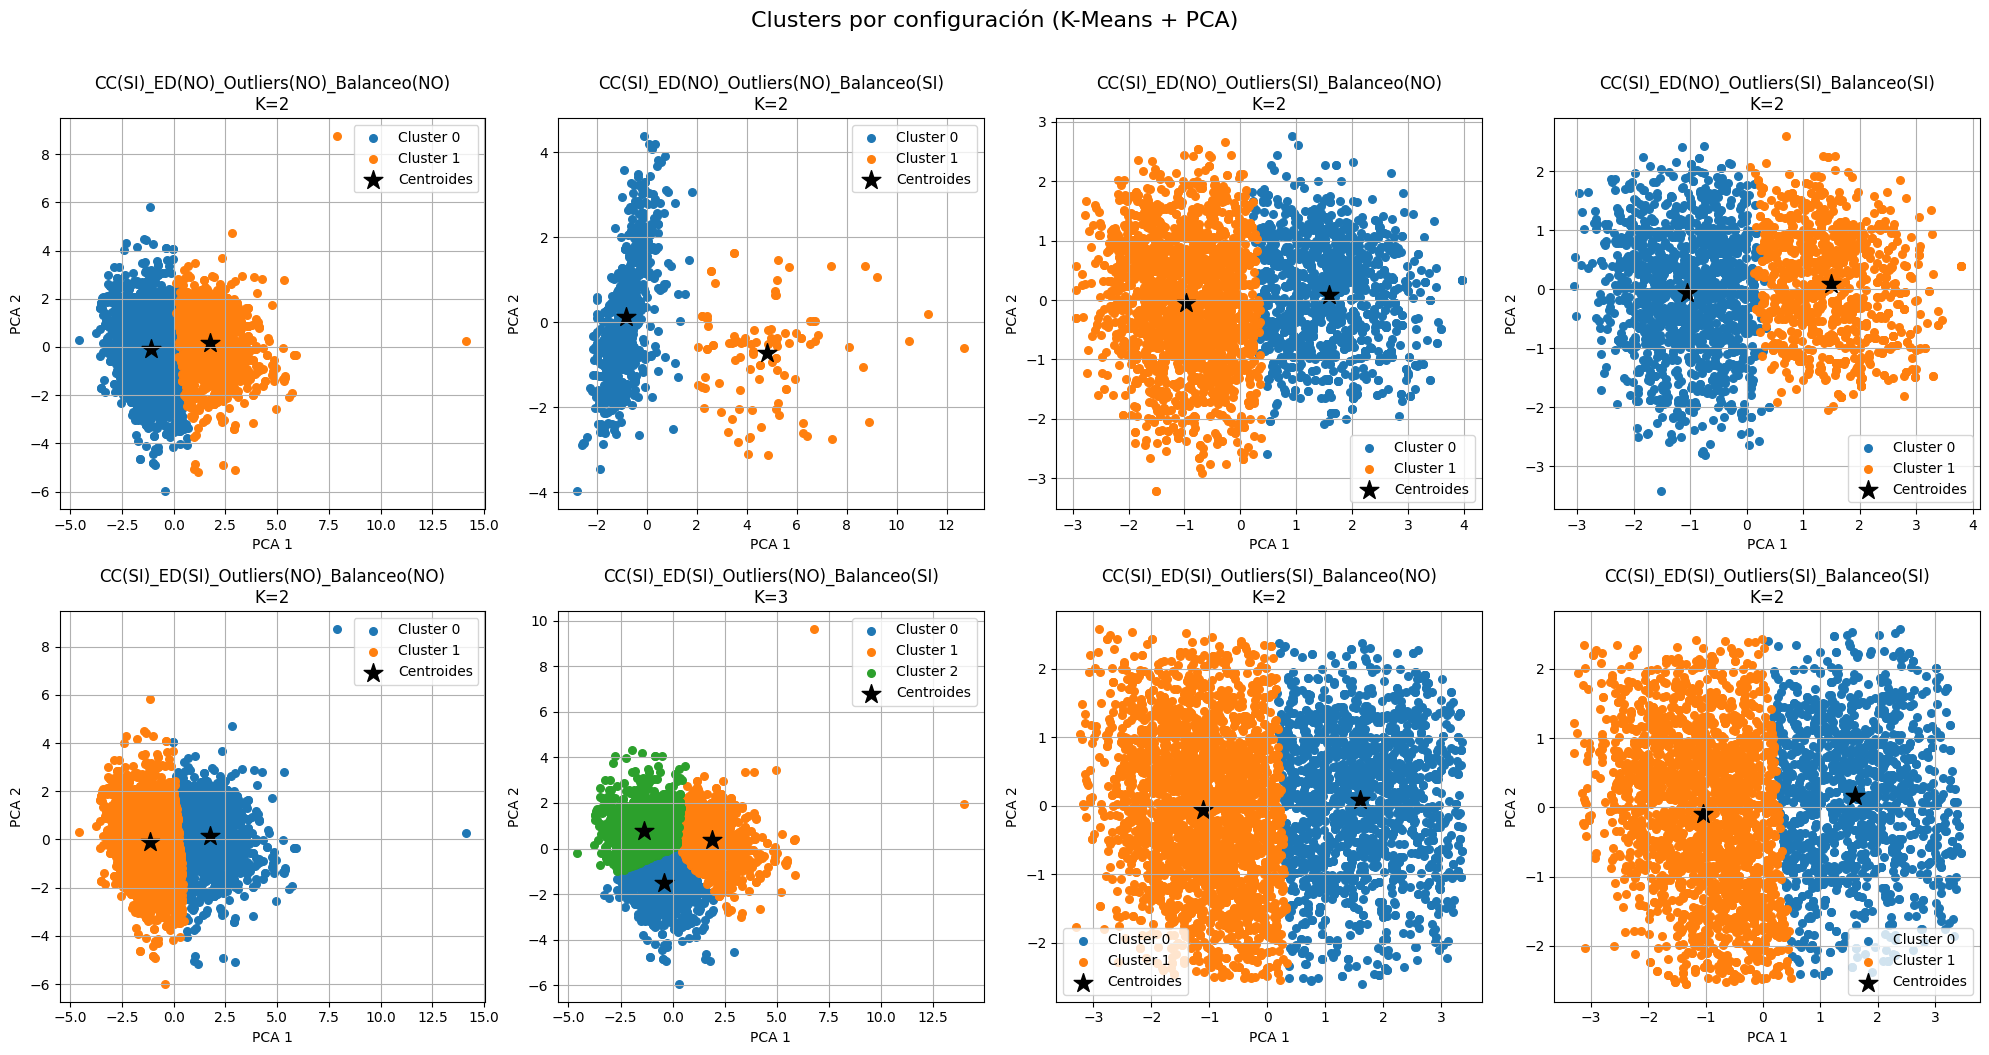

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crear figura grande con subplots (2 filas x 4 columnas)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Recorremos los resultados guardados para cada configuración
for idx, (config, resultados) in enumerate(resultados_kmeans.items()):
    kmeans = resultados['modelo']
    X_temp = datasets[config]
    etiquetas = resultados['etiquetas']
    k_optimo = resultados['k_optimo']

    # Aplicar PCA a los datos para reducir a 2D
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_temp)

    # Proyectar los centroides al mismo espacio PCA
    centroides_pca = pca.transform(kmeans.cluster_centers_)

    # Graficar en el subplot correspondiente
    ax = axes[idx]
    for cluster_id in range(k_optimo):
        puntos_cluster = X_pca[etiquetas == cluster_id]
        ax.scatter(puntos_cluster[:, 0], puntos_cluster[:, 1], label=f'Cluster {cluster_id}', s=30)

    ax.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
               s=200, c='black', marker='*', label='Centroides')

    ax.set_title(f'{config}\nK={k_optimo}')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.legend()
    ax.grid(True)

# Ajustar diseño general
plt.tight_layout()
plt.suptitle('Clusters por configuración (K-Means + PCA)', fontsize=16, y=1.05)
plt.show()


### Grafica para DBSCAN

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32012\4211721699.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


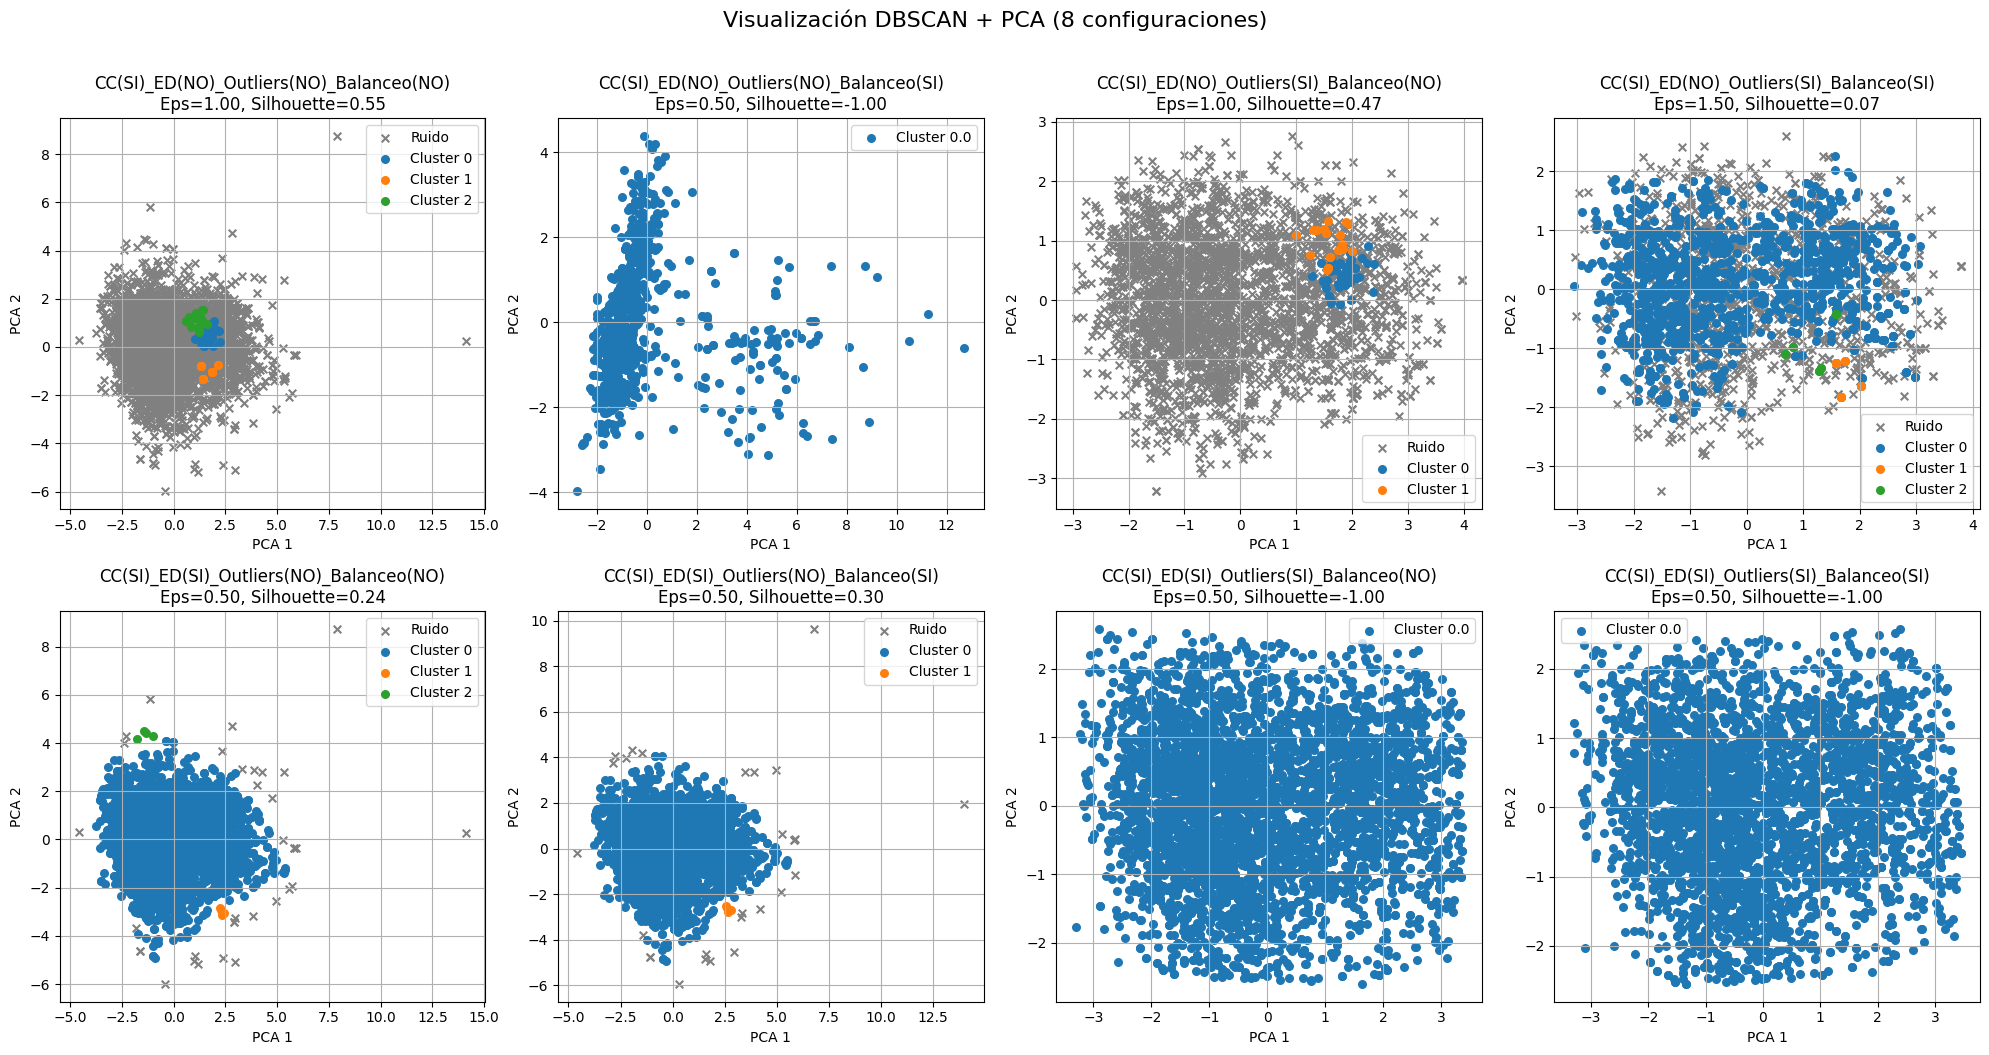

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Crear figura con 8 subgráficos (2 filas, 4 columnas)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Paleta de colores para clusters (excluyendo el ruido)
from matplotlib import cm
cmap = cm.get_cmap('tab10')

for idx, (config, resultados) in enumerate(resultados_dbscan.items()):
    etiquetas = resultados['etiquetas']
    X_temp = datasets[config]

    # Aplicar PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_temp)

    # Graficar clusters
    ax = axes[idx]
    etiquetas_unicas = np.unique(etiquetas)

    for etiqueta in etiquetas_unicas:
        puntos = X_pca[etiquetas == etiqueta]
        if etiqueta == -1:
            # Ruido: color gris
            ax.scatter(puntos[:, 0], puntos[:, 1], c='gray', label='Ruido', s=30, marker='x')
        else:
            color = cmap(etiqueta % 10)  # Rotar colores si hay más de 10 clusters
            ax.scatter(puntos[:, 0], puntos[:, 1], c=[color], label=f'Cluster {etiqueta}', s=30)

    ax.set_title(f'{config}\nEps={resultados["eps"]:.2f}, Silhouette={resultados["silhouette"]:.2f}')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.legend()
    ax.grid(True)

# Ajustar espacios entre subgráficos
plt.tight_layout()
plt.suptitle('Visualización DBSCAN + PCA (8 configuraciones)', fontsize=16, y=1.05)
plt.show()
